# ENSO Diversity

Calculate the diversity between Eastern and Central ENSO, based on first and second principal components.

This is based on the Cai 2018 method, with results for CMIP6 published in Wang 2020.


In [1]:
import sys
sys.path.append('../')

#import my functions
import utils._modelDefinitions as _model
import utils.ecIndex as ec

In [2]:
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


import climtas.nci

climtas.nci.GadiClient()

In [3]:
#load the full model set
modelSet=_model.scenarioMip

For all the models, calculate the alphas

%run wangsAlphas.py
#easiest to run on gadi

In [4]:
#multipliers determined through visual inspection to give a negative alpha
#sign is arbitrary in an EOF
multipliers={'ACCESS-CM2':[1,1], 
    'ACCESS-ESM1-5':[-1,1],
    'BCC-CSM2-MR':[-1,1],
    'CAMS-CSM1-0':[1,-1],
    'CAS-ESM2-0':[1,-1],
    'CESM2':[1,1], 
    'CESM2-WACCM':[-1,-1],
    'CIESM':[-1,1], 
    'CMCC-CM2-SR5':[-1,-1],
    'CMCC-ESM2':[-1,-1], 
    'CNRM-CM6-1':[-1,1], 
    'CNRM-ESM2-1':[-1,-1], 
    'CanESM5':[1,-1],
    'CanESM5-CanOE':[1,-1], 
    'EC-Earth3':[1,-1], 
    'EC-Earth3-CC':[-1,-1], 
    'EC-Earth3-Veg':[1,-1],
    'EC-Earth3-Veg-LR':[1,1], 
    'FIO-ESM-2-0':[-1,1],
    'GFDL-CM4':[-1,1], 
    'GFDL-ESM4':[1,-1], 
    'GISS-E2-1-G':[1,-1],
    'HadGEM3-GC31-LL':[1,-1], 
    'HadGEM3-GC31-MM':[1,1], 
    'INM-CM4-8':[1,1], 
    'INM-CM5-0':[1,1],
    'IPSL-CM6A-LR':[1,-1], 
    'KACE-1-0-G':[1,-1], 
    'MCM-UA-1-0':[1,-1], 
    'MIROC-ES2L':[1,1], 
    'MIROC6':[-1,-1],
    'MPI-ESM1-2-HR':[-1,-1], 
    'MPI-ESM1-2-LR':[1,1],
    'MRI-ESM2-0':[1,1], 
    'NESM3':[1,-1],
    'NorESM2-LM':[-1,-1], 
    'NorESM2-MM':[1,1], 
    'UKESM1-0-LL':[1,1] 
    }

ACCESS-CM2
[1, 1]
-0.11100662645988905  ....  -0.31594882907643596


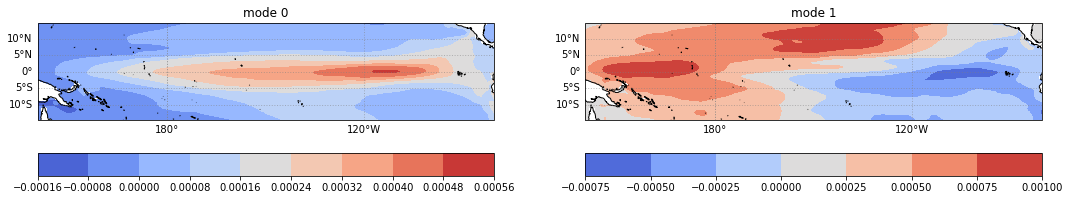

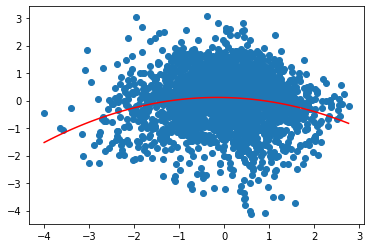

ACCESS-ESM1-5
[-1, 1]
-0.051952494722133466  ....  -0.21344412030183985


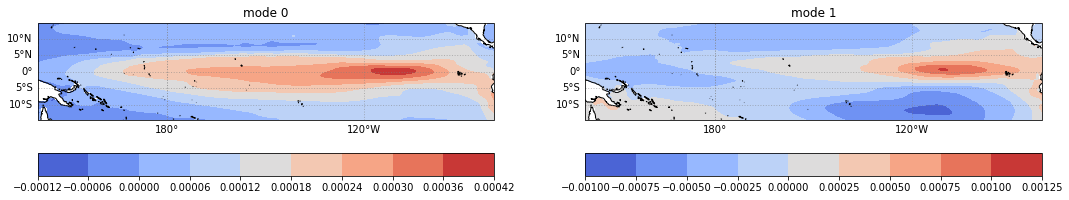

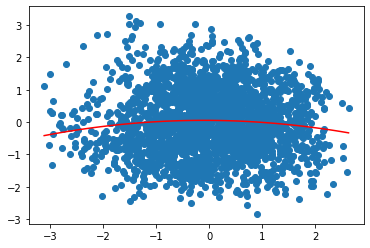

BCC-CSM2-MR
[-1, 1]
-0.0836200551950969  ....  0.08388469008853353


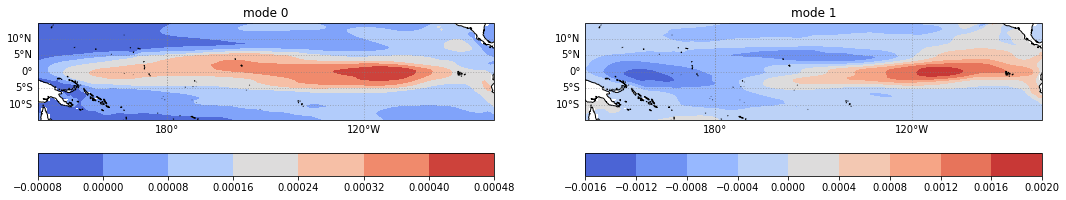

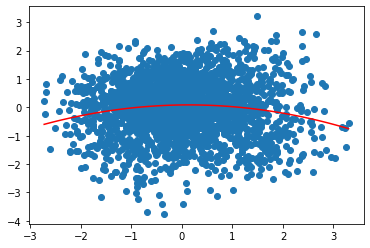

CAMS-CSM1-0
[1, -1]
-0.28414774327271647  ....  -0.4519746364809865


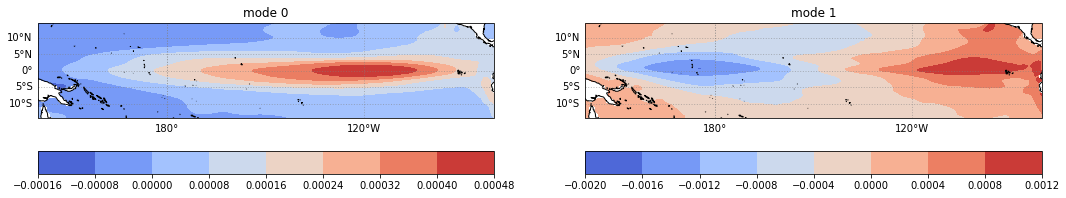

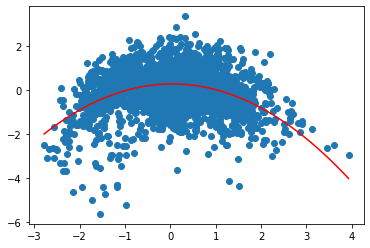

CAS-ESM2-0
[1, -1]
-0.23147687221003094  ....  0.4061616851568129


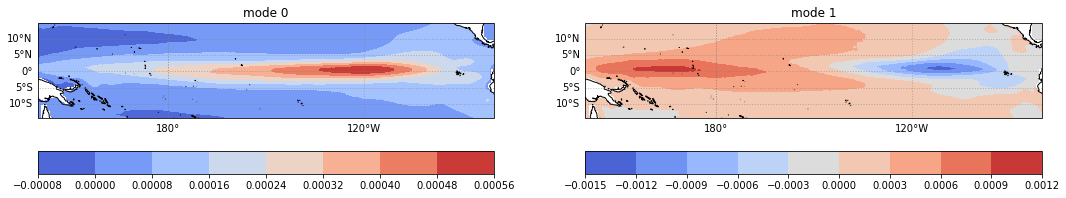

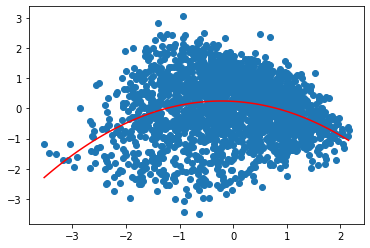

CESM2
[1, 1]
-0.18131488155910333  ....  -0.558642876107533


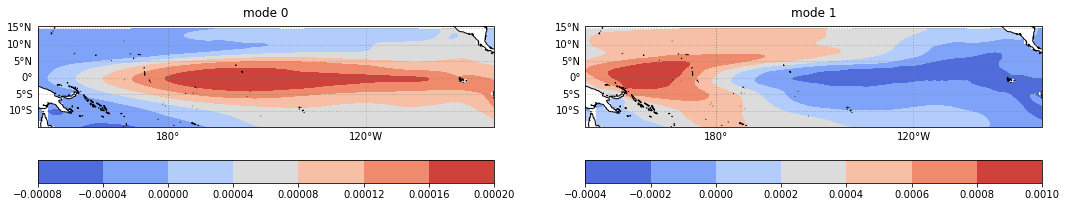

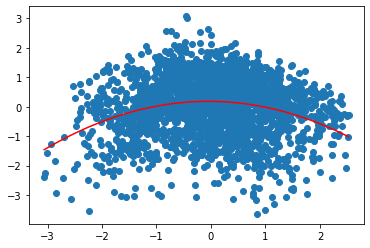

CESM2-WACCM
[-1, -1]
-0.19982634585706577  ....  0.549983392652545


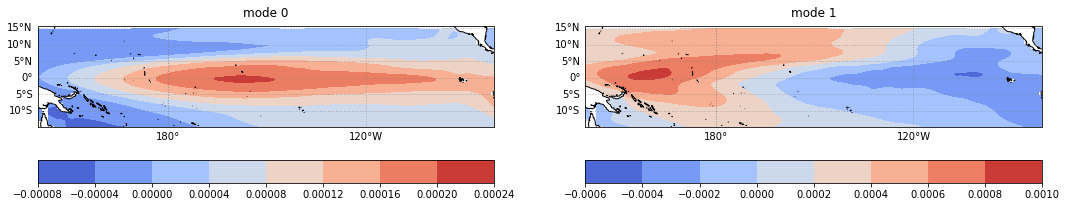

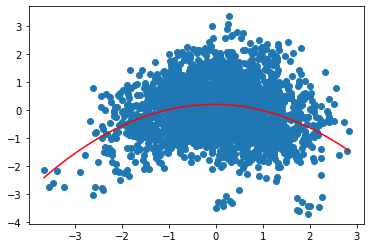

CIESM
[-1, 1]
-0.243649500347558  ....  -0.5943369856551172


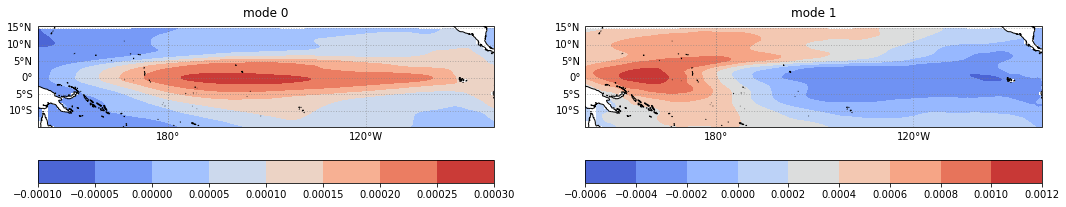

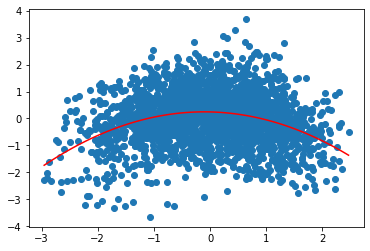

CMCC-CM2-SR5
[-1, -1]
-0.3893086315137675  ....  -0.7034591401213678


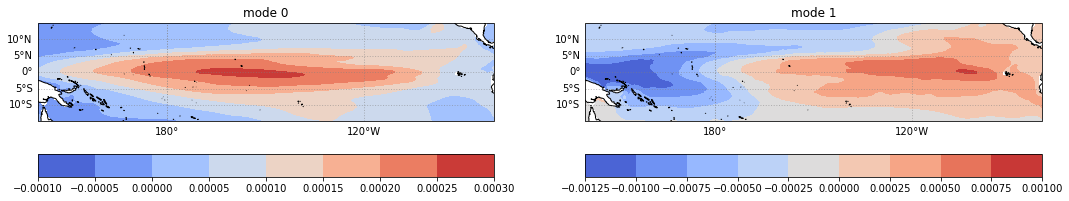

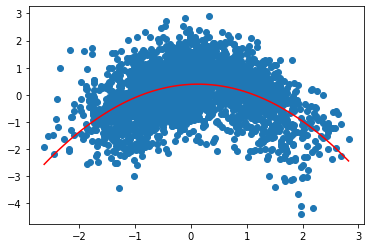

CMCC-ESM2
[-1, -1]
-0.43505660660148376  ....  0.7337070177883266


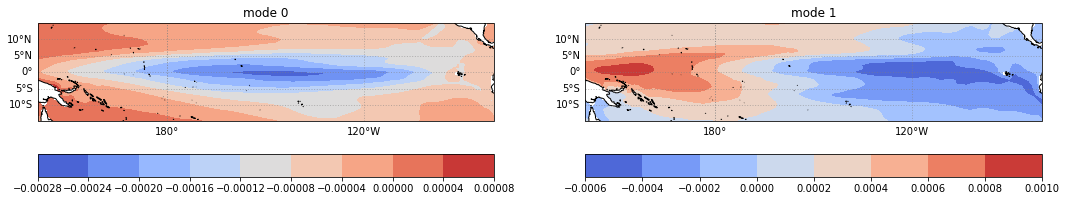

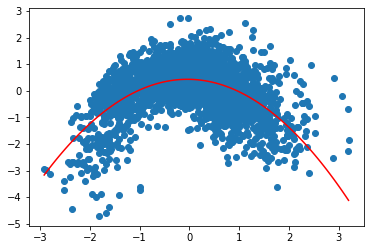

CNRM-CM6-1
[-1, 1]
-0.15714947591073608  ....  -0.39538572355173957


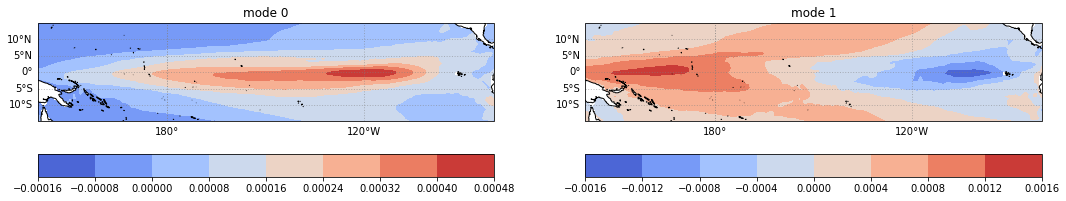

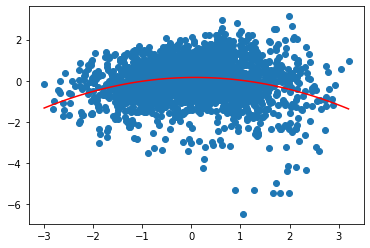

CNRM-ESM2-1
[-1, -1]
-0.16649686062678928  ....  0.4040685281209116


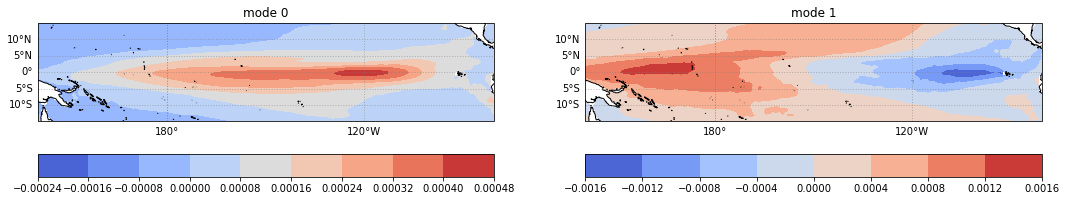

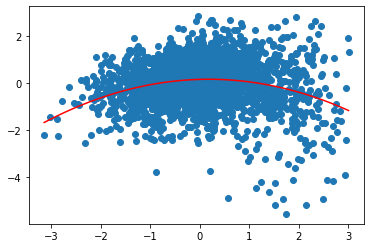

CanESM5
[1, -1]
-0.025288992299442217  ....  0.04873440828041724


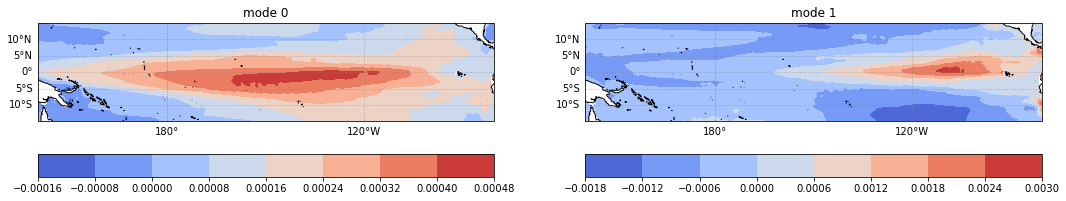

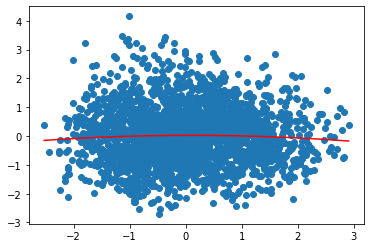

CanESM5-CanOE
[1, -1]
-0.049957122587976126  ....  0.05042941112976595


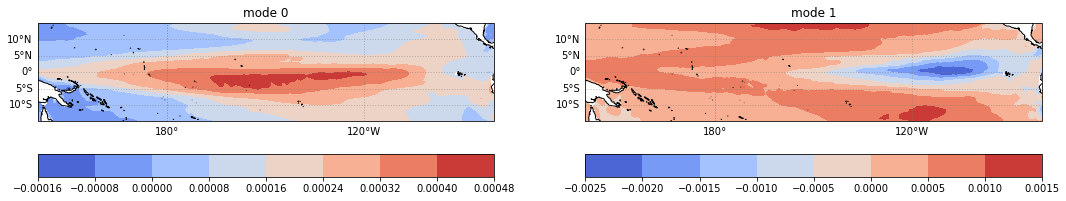

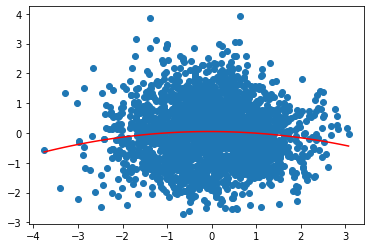

EC-Earth3
[1, -1]
-0.2526927363668093  ....  -0.5423139039131891


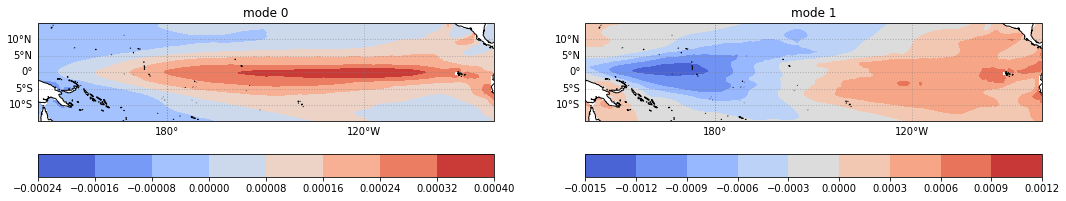

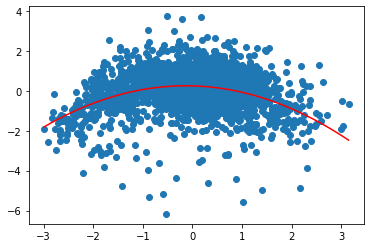

EC-Earth3-CC
[-1, -1]
-0.28889392969341876  ....  0.6145337622083133


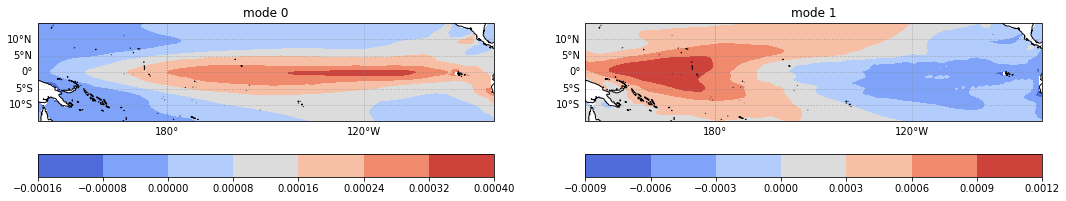

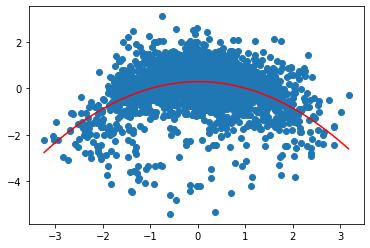

EC-Earth3-Veg
[1, -1]
-0.23994393483609167  ....  -0.54336636981204


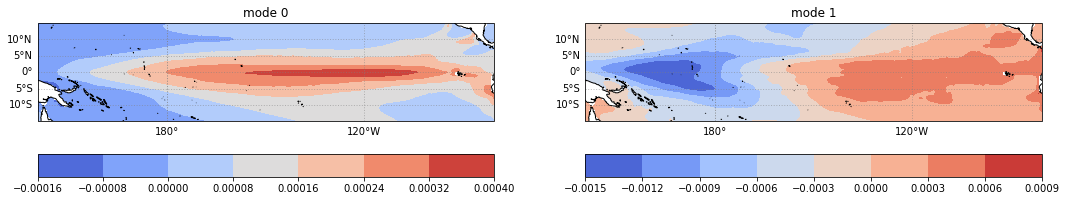

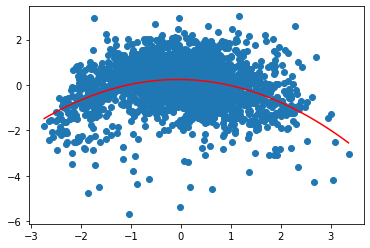

EC-Earth3-Veg-LR
[1, 1]
-0.22276375440728502  ....  -0.7324769985531794


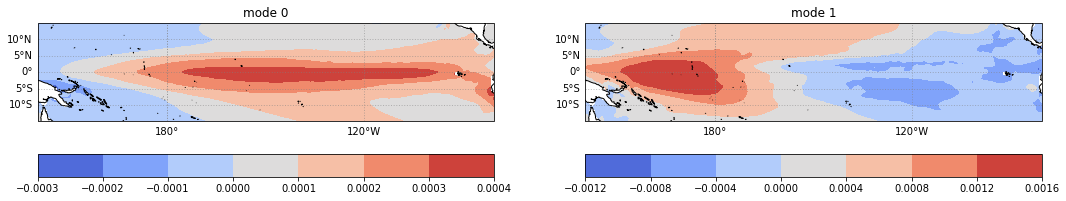

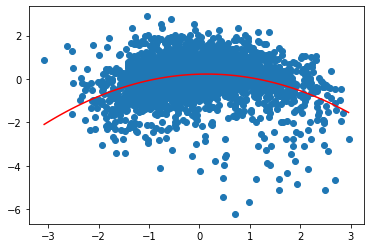

FIO-ESM-2-0
[-1, 1]
-0.38027105944441614  ....  0.5959027340614247
'DataArray' object has no attribute 'lon'
GFDL-CM4
[-1, 1]
-0.12858302359927826  ....  -0.3663755266709173


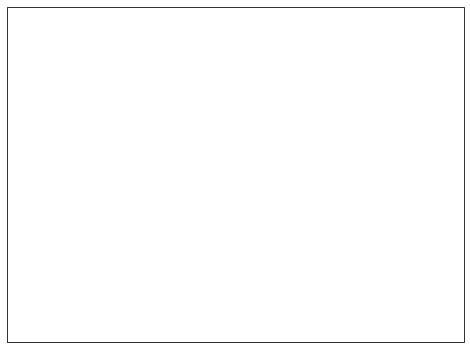

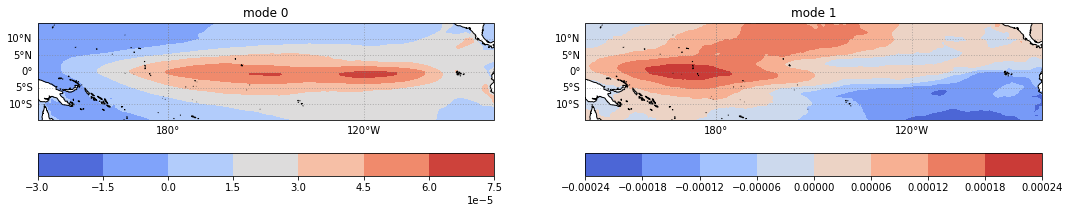

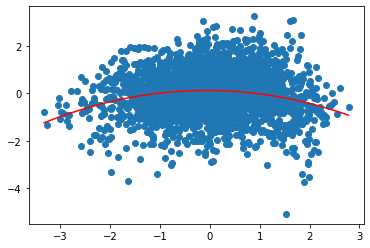

GFDL-ESM4
[1, -1]
-0.1933431399613228  ....  0.47987052903367405


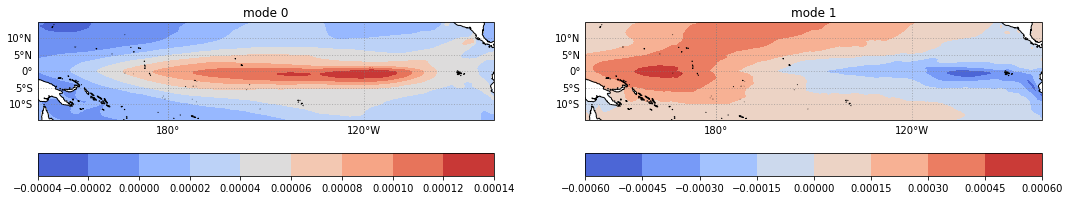

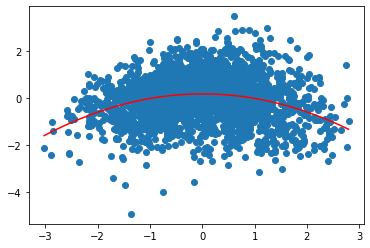

GISS-E2-1-G
[1, -1]
-0.3614290347924608  ....  0.47809609714660056


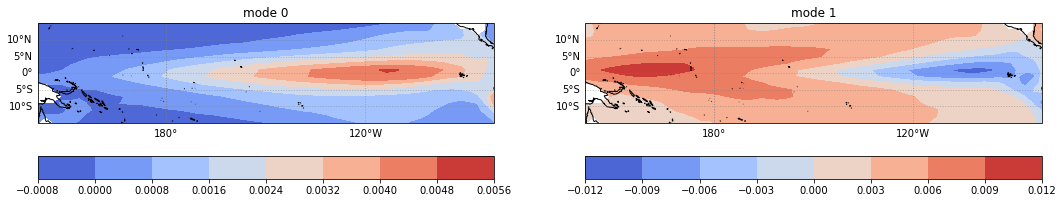

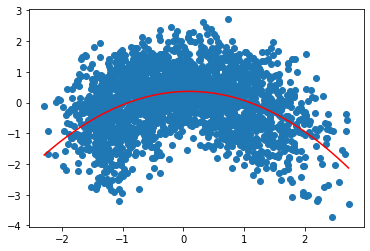

HadGEM3-GC31-LL
[1, -1]
-0.18980297538273963  ....  0.3972199730240259


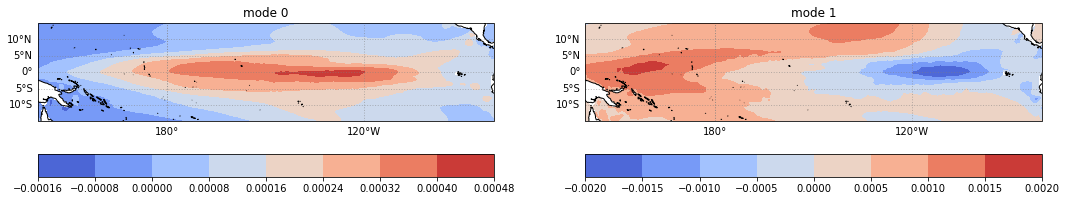

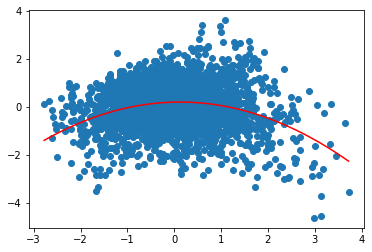

HadGEM3-GC31-MM
[1, 1]
-0.1973979453588834  ....  -0.2046490330219596


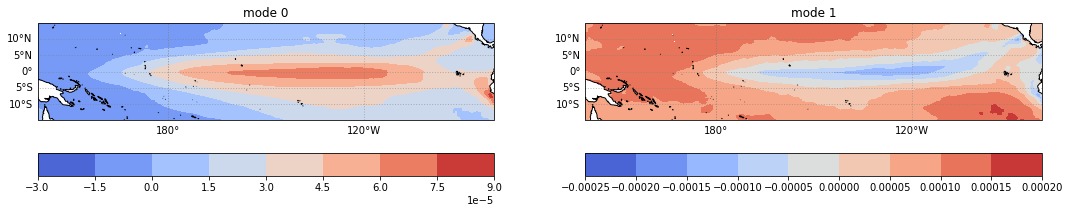

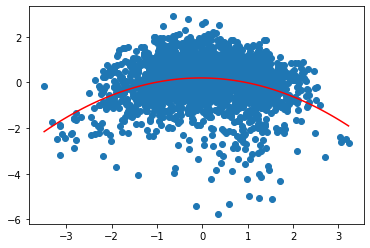

INM-CM4-8
[1, 1]
-0.014454826862872984  ....  -0.03982026221353971


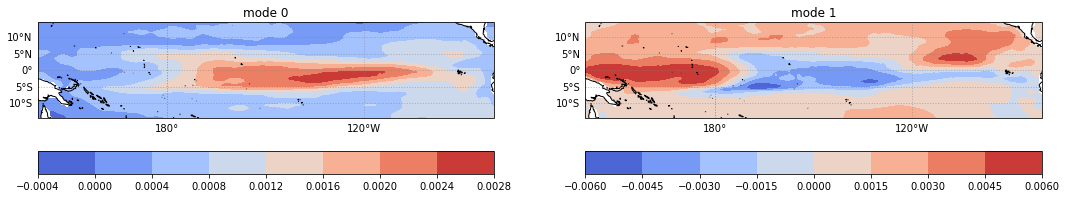

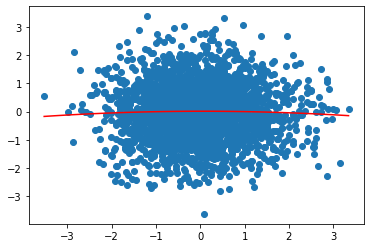

INM-CM5-0
[1, 1]
-0.016410952116096514  ....  0.0018579778494074392


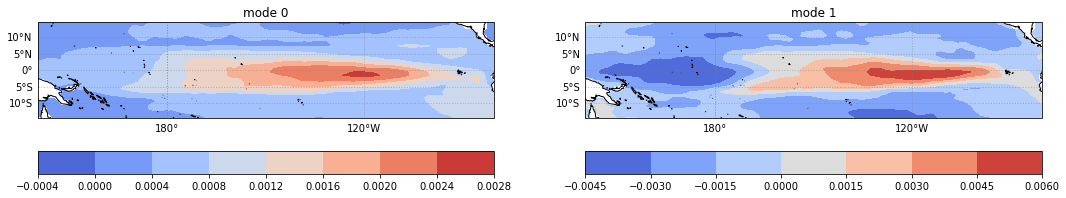

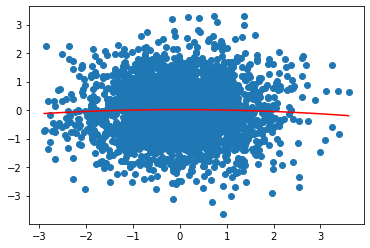

IPSL-CM6A-LR
[1, -1]
-0.05659890838651161  ....  0.29562231647570025


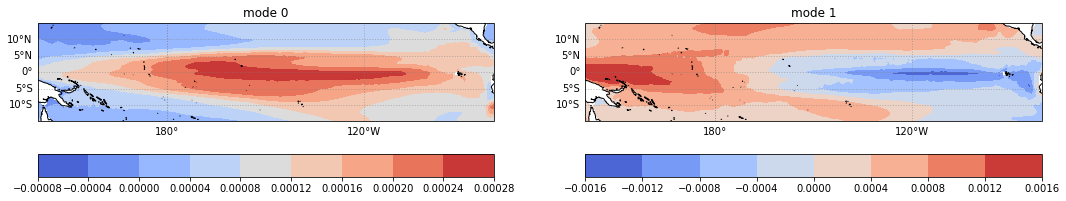

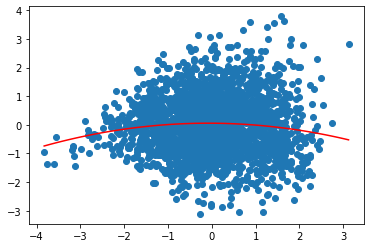

KACE-1-0-G
[1, -1]
-0.015211422861209667  ....  -0.05269779802468717


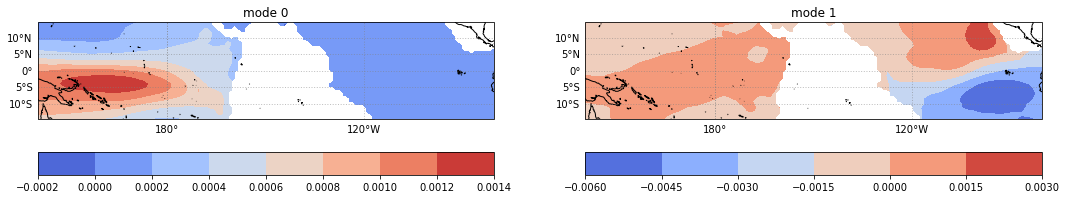

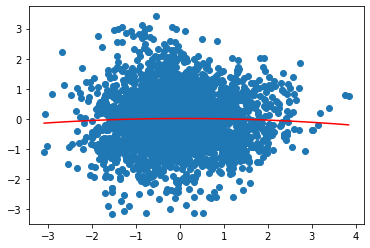

MCM-UA-1-0
[1, -1]
-0.28568839972191445  ....  -0.40545143544083145


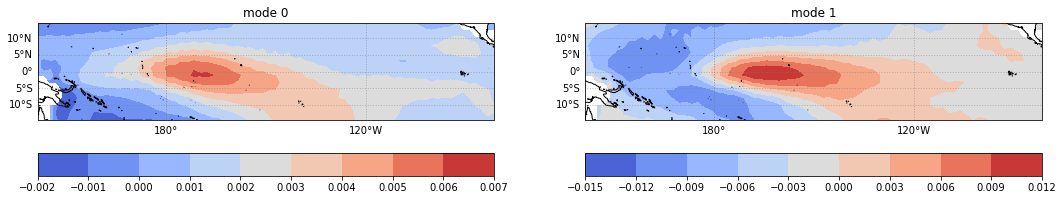

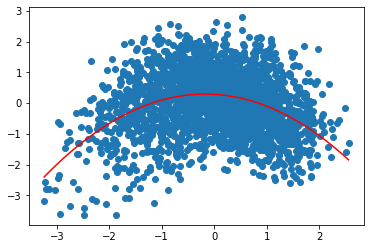

MIROC-ES2L
[1, 1]
-0.3335043982365968  ....  0.8661432379781777


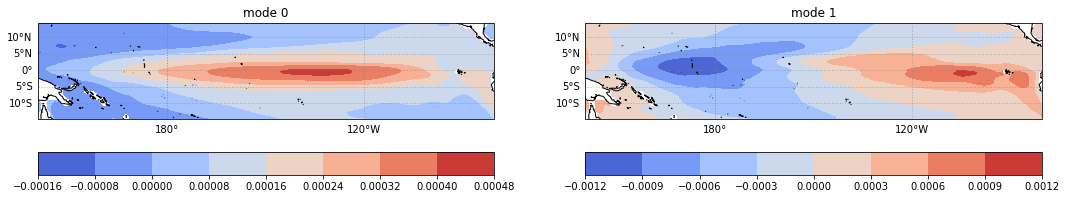

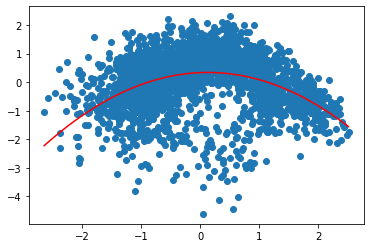

MIROC6
[-1, -1]
-0.31770928520399483  ....  0.6501242366766028


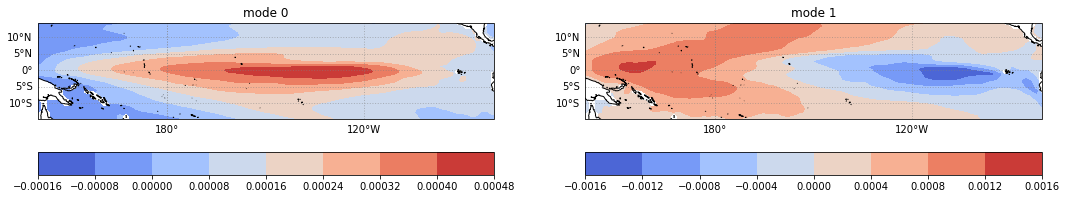

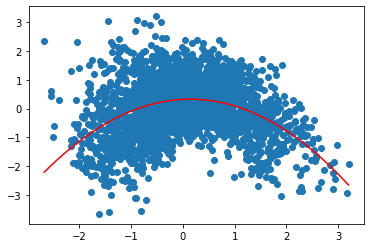

MPI-ESM1-2-HR
[-1, -1]
-0.24698480210373278  ....  -0.153691511657079


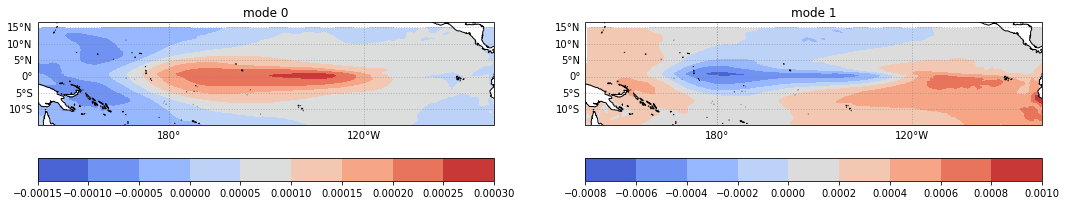

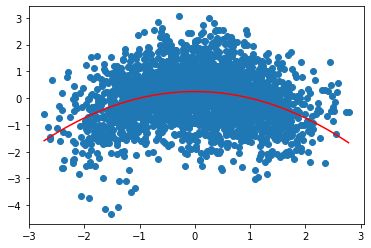

MPI-ESM1-2-LR
[1, 1]
-0.2015519099329522  ....  0.5377769516312338


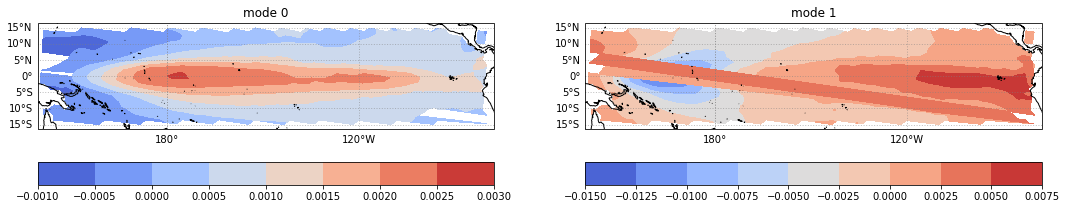

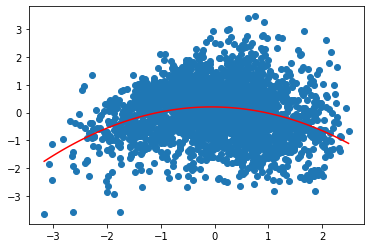

MRI-ESM2-0
[1, 1]
-0.3469949736502555  ....  0.6280817446807483


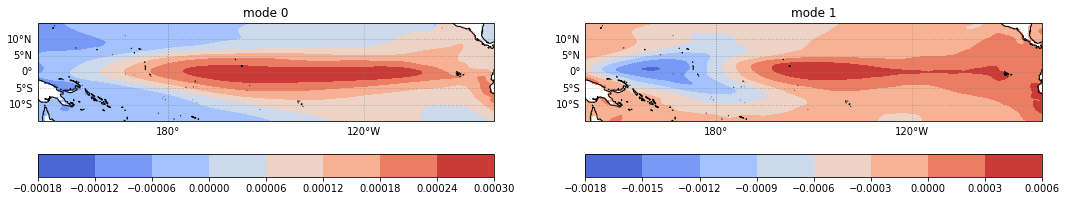

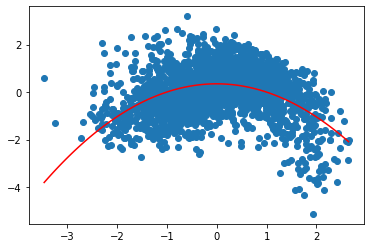

NESM3
[1, -1]
-0.04457945480942532  ....  -0.12858502678575254


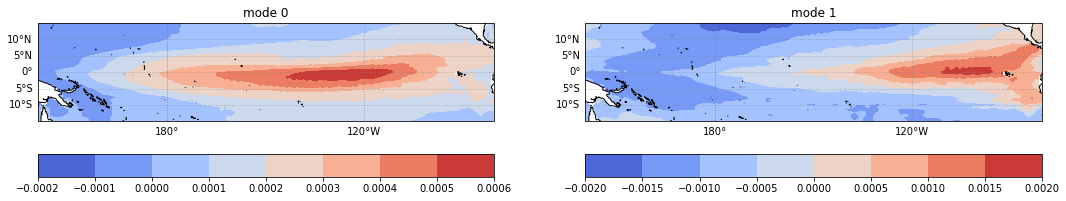

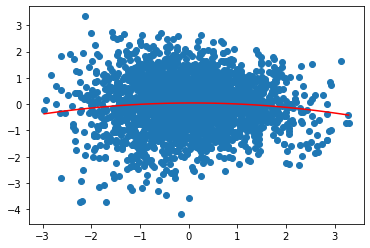

NorESM2-LM
[-1, -1]
-0.25410652241342707  ....  0.5492649851580292


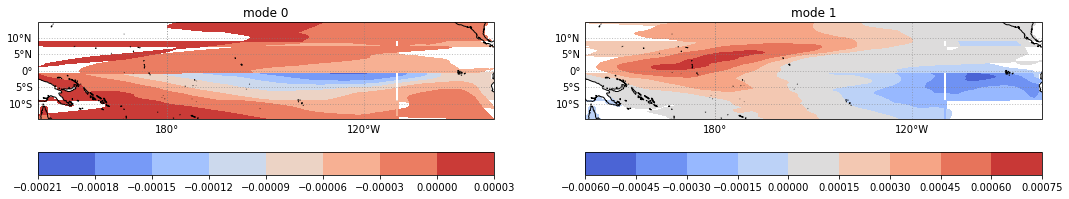

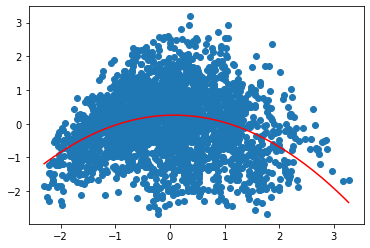

NorESM2-MM
[1, 1]
-0.20586533472477395  ....  0.2950412037236956


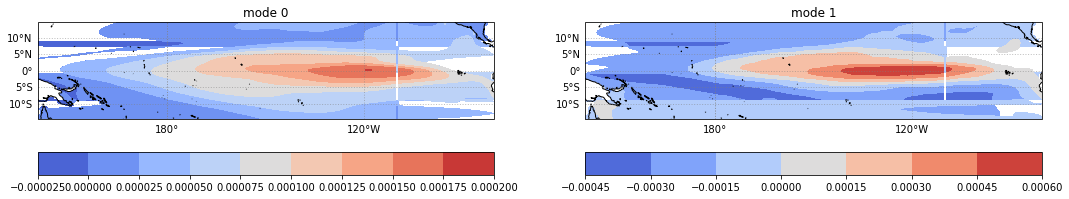

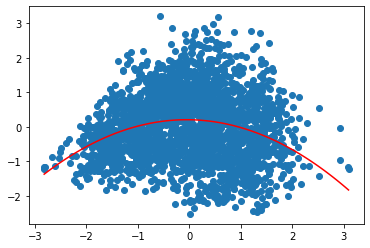

UKESM1-0-LL
[1, 1]
-0.13493266715338262  ....  0.41743101518009657


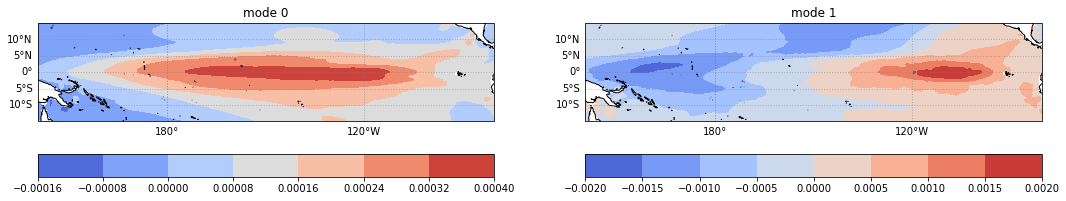

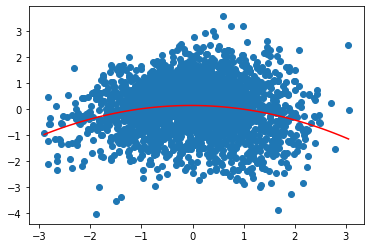

In [5]:
alphas=dict()

for iModel in modelSet:
    import numpy.polynomial as poly
    try:
        print(iModel[1])
        
        indeces=xarray.load_dataset('results/wangAlphas/index'+str(iModel[1])+'.nc')
        eofsXr=xarray.load_dataarray('results/wangAlphas/eof'+str(iModel[1])+'.nc')
        
        alpha=float(indeces.alpha.values)
        
        multiplyBy=multipliers[iModel[1]]
        
        print(multiplyBy)
        
        pc1=multiplyBy[0]*indeces.pc1
        pc2=multiplyBy[1]*indeces.pc2
        pFit = poly.Polynomial.fit(pc1, pc2, 2)
        alpha = pFit.convert().coef[2]
        
        print(str(alpha)+'  ....  ' + str(indeces.alphaDjf.values))
        alphas[iModel[1]]=alpha
        
        fig=plt.figure(figsize=(18,12))
        
        for mode in [0,1]:
            ax=fig.add_subplot(1,2,mode+1,
                           projection=ccrs.Miller(central_longitude=210))

            ec.ensoPlotter(multiplyBy[mode]*eofsXr.sel(mode=mode), ax)

            plt.title("mode " + str(mode))

        plt.show()

        
        
        plt.scatter(pc1, pc2)

        plt.plot(*pFit.linspace(), 'r')
        
        plt.show()
    except Exception as e:
        print(e)
    

This is the models which have alpha less than -0.15 from the Wang 2020

In [6]:
wangsAnswers={'CAMS-CSM1-0':-0.2902, 
    'CMCC-CM2-SR5':-0.4055, 
    'CNRM-CM6-1':-0.1662, 
    'CNRM-ESM2-1':-0.1687,
    'EC-Earth3':-0.2662, 
    'EC-Earth3-Veg':-0.2665, 
    'FIO-ESM-2-0':-0.3751,
    'MIROC6':-0.3198, 
    'MIROC-ES2L': -0.3466,
    'HadGEM3-GC31-LL':-0.1785, 
    'MPI-ESM1-2-HR':-0.2660, 
    'MPI-ESM1-2-LR':-0.2338, 
    'MRI-ESM2-0':-0.3387,
    'GISS-E2-1-G':-0.3644, 
    'CESM2':-0.3216, 
    'CESM2-WACCM':-0.2436, 
    'NorESM2-LM':-0.2505, 
    'NorESM2-MM':-.2077,
    'GFDL-ESM4':-.1931, 
    'CIESM':-.1886, 
    'MCM-UA-1-0':-0.2888}

In [7]:
print('model         calculated           expected')
for iModel in wangsAnswers.keys():
    try:
        print(str(iModel) + ' : ' + str(alphas[iModel]) + '   ' + str(wangsAnswers[iModel]))
    except:
        print(str(iModel) + ' results not found')

model         calculated           expected
CAMS-CSM1-0 : -0.28414774327271647   -0.2902
CMCC-CM2-SR5 : -0.3893086315137675   -0.4055
CNRM-CM6-1 : -0.15714947591073608   -0.1662
CNRM-ESM2-1 : -0.16649686062678928   -0.1687
EC-Earth3 : -0.2526927363668093   -0.2662
EC-Earth3-Veg : -0.23994393483609167   -0.2665
FIO-ESM-2-0 : -0.38027105944441614   -0.3751
MIROC6 : -0.31770928520399483   -0.3198
MIROC-ES2L : -0.3335043982365968   -0.3466
HadGEM3-GC31-LL : -0.18980297538273963   -0.1785
MPI-ESM1-2-HR : -0.24698480210373278   -0.266
MPI-ESM1-2-LR : -0.2015519099329522   -0.2338
MRI-ESM2-0 : -0.3469949736502555   -0.3387
GISS-E2-1-G : -0.3614290347924608   -0.3644
CESM2 : -0.18131488155910333   -0.3216
CESM2-WACCM : -0.19982634585706577   -0.2436
NorESM2-LM : -0.25410652241342707   -0.2505
NorESM2-MM : -0.20586533472477395   -0.2077
GFDL-ESM4 : -0.1933431399613228   -0.1931
CIESM : -0.243649500347558   -0.1886
MCM-UA-1-0 : -0.28568839972191445   -0.2888


In [8]:
for iModel in wangsAnswers.keys():
        try:
            if alphas[iModel]<-0.15:
                print(iModel + ' matched: ' + str(alphas[iModel]) + '  ' + str(wangsAnswers[iModel]))
            else:
                print(iModel + ' not matched: ' + str(alphas[iModel]) + '  ' + str(wangsAnswers[iModel]))
        except:
            print(iModel + ' not matched')

CAMS-CSM1-0 matched: -0.28414774327271647  -0.2902
CMCC-CM2-SR5 matched: -0.3893086315137675  -0.4055
CNRM-CM6-1 matched: -0.15714947591073608  -0.1662
CNRM-ESM2-1 matched: -0.16649686062678928  -0.1687
EC-Earth3 matched: -0.2526927363668093  -0.2662
EC-Earth3-Veg matched: -0.23994393483609167  -0.2665
FIO-ESM-2-0 matched: -0.38027105944441614  -0.3751
MIROC6 matched: -0.31770928520399483  -0.3198
MIROC-ES2L matched: -0.3335043982365968  -0.3466
HadGEM3-GC31-LL matched: -0.18980297538273963  -0.1785
MPI-ESM1-2-HR matched: -0.24698480210373278  -0.266
MPI-ESM1-2-LR matched: -0.2015519099329522  -0.2338
MRI-ESM2-0 matched: -0.3469949736502555  -0.3387
GISS-E2-1-G matched: -0.3614290347924608  -0.3644
CESM2 matched: -0.18131488155910333  -0.3216
CESM2-WACCM matched: -0.19982634585706577  -0.2436
NorESM2-LM matched: -0.25410652241342707  -0.2505
NorESM2-MM matched: -0.20586533472477395  -0.2077
GFDL-ESM4 matched: -0.1933431399613228  -0.1931
CIESM matched: -0.243649500347558  -0.1886
MCM-U

Those results are broadly similar. 


Except:
CESM2 matched: -0.18131488155910333  -0.3216
But they retracted and repovided ssp585 in late 2020 due to some issues with the forcings, which might explain that.




# Full example /sandbox

Climatology and piControl:

In [9]:
import helpers.fileHandler as fh
import utils.timePeriod as tp

In [10]:
for iModel in [modelSet[33]]:
    
    #print(iModel)
    
    #try: 
            
        #to replicate Wang 2020
        tsXr = xarray.concat([fh.loadModelData(iModel[1], 'tos_Omon', 'historical', iModel[3]).tos, 
                              fh.loadModelData(iModel[1], 'tos_Omon', 'ssp585', iModel[3]).tos], 
                             dim='time')

    #except Exception as e:
    #    print(iModel[1] + " did not open")
    #    print(e)
 

['/g/data/oi10/replicas/CMIP6/CMIP//MRI/MRI-ESM2-0/historical/r1i1p1f1/Omon/tos/gn/v20190904/tos_Omon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc']
['/g/data/oi10/replicas/CMIP6/ScenarioMIP//MRI/MRI-ESM2-0/ssp585/r1i1p1f1/Omon/tos/gn/v20191108/tos_Omon_MRI-ESM2-0_ssp585_r1i1p1f1_gn_210101-230012.nc', '/g/data/oi10/replicas/CMIP6/ScenarioMIP//MRI/MRI-ESM2-0/ssp585/r1i1p1f1/Omon/tos/gn/v20191108/tos_Omon_MRI-ESM2-0_ssp585_r1i1p1f1_gn_201501-210012.nc']


In [11]:
tsXr.lon

<xarray.DataArray 'lon' (y: 363, x: 360)>
array([[80.        , 81.        , 82.        , ..., 77.        ,
        78.        , 79.        ],
       [80.        , 81.        , 82.        , ..., 77.        ,
        78.        , 79.        ],
       [80.        , 81.        , 82.        , ..., 77.        ,
        78.        , 79.        ],
       ...,
       [80.        , 80.07549286, 80.15103149, ..., 79.77333832,
        79.84896851, 79.92450714],
       [80.        , 80.03778839, 80.07559967, ..., 79.8865509 ,
        79.92440033, 79.96221161],
       [80.        , 80.        , 80.        , ..., 80.        ,
        80.        , 80.        ]])
Coordinates:
  * y        (y) float64 -78.0 -77.5 -77.0 -76.5 ... 147.5 149.7 151.8 154.0
  * x        (x) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    lat      (y, x) float64 -78.0 -78.0 -78.0 -78.0 ... 65.7 65.29 64.86 64.43
    lon      (y, x) float64 80.0 81.0 82.0 83.0 84.0 ... 80.0 80.0 80.0 80.0

Cut it into the area of interest

In [12]:
tsXr=tsXr.where(
    (tsXr.lat>=-15) & (tsXr.lat<=15) &
    (tsXr.lon>=140) & (tsXr.lon<=280),
    drop=True
)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/xarray/core/indexing.py:1385: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


In [13]:
tsXr

<xarray.DataArray 'tos' (time: 5412, y: 87, x: 141)>
dask.array<where, shape=(5412, 87, 141), dtype=float32, chunksize=(2400, 87, 141), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-16 00:00:00 ... 2300-12-16 00:00:00
  * y        (y) float64 -15.0 -14.5 -14.0 -13.5 -13.0 ... 13.5 14.0 14.5 15.0
  * x        (x) float64 60.0 61.0 62.0 63.0 64.0 ... 197.0 198.0 199.0 200.0
    lat      (y, x) float64 -15.0 -15.0 -15.0 -15.0 ... 15.0 15.0 15.0 15.0
    lon      (y, x) float64 140.0 141.0 142.0 143.0 ... 277.0 278.0 279.0 280.0
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Sea Surface Temperature
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    units:          degC
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
    history:        2019-09-03T06:33:16Z altered by CMOR: replaced missing va...

In [14]:
tsXr=tsXr.where(
    (tsXr.time.dt.year>=1900) * (tsXr.time.dt.year<2100), 
    drop=True
)


In [15]:
tsXr 

<xarray.DataArray 'tos' (time: 2400, y: 87, x: 141)>
dask.array<where, shape=(2400, 87, 141), dtype=float32, chunksize=(1380, 87, 141), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1900-01-16 00:00:00 ... 2099-12-16 00:00:00
  * y        (y) float64 -15.0 -14.5 -14.0 -13.5 -13.0 ... 13.5 14.0 14.5 15.0
  * x        (x) float64 60.0 61.0 62.0 63.0 64.0 ... 197.0 198.0 199.0 200.0
    lat      (y, x) float64 -15.0 -15.0 -15.0 -15.0 ... 15.0 15.0 15.0 15.0
    lon      (y, x) float64 140.0 141.0 142.0 143.0 ... 277.0 278.0 279.0 280.0
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Sea Surface Temperature
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    units:          degC
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
    history:        2019-09-03T06:33:16Z altered by CMOR: replaced missing va...

In [16]:
from eofs.xarray import Eof



In [17]:
trendXr = tsXr.polyfit('time', 2)

In [18]:
trendXr

<xarray.Dataset>
Dimensions:               (degree: 3, x: 141, y: 87)
Coordinates:
  * degree                (degree) int64 2 1 0
  * y                     (y) float64 -15.0 -14.5 -14.0 -13.5 ... 14.0 14.5 15.0
  * x                     (x) float64 60.0 61.0 62.0 63.0 ... 198.0 199.0 200.0
Data variables:
    polyfit_coefficients  (degree, y, x) float64 dask.array<chunksize=(3, 87, 141), meta=np.ndarray>

In [19]:
trendXr = xarray.polyval(tsXr.time, trendXr.polyfit_coefficients, 'degree')


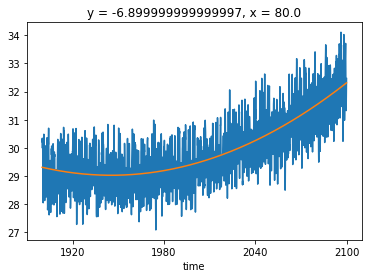

In [20]:
tsXr.isel(y=20,x=20).plot()
trendXr.isel(y=20,x=20).plot()

In [21]:
detrendXr=tsXr-trendXr

In [22]:
detrendXr

<xarray.DataArray (time: 2400, y: 87, x: 141)>
dask.array<sub, shape=(2400, 87, 141), dtype=float64, chunksize=(1380, 87, 141), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1900-01-16 00:00:00 ... 2099-12-16 00:00:00
  * y        (y) float64 -15.0 -14.5 -14.0 -13.5 -13.0 ... 13.5 14.0 14.5 15.0
  * x        (x) float64 60.0 61.0 62.0 63.0 64.0 ... 197.0 198.0 199.0 200.0
    lat      (y, x) float64 -15.0 -15.0 -15.0 -15.0 ... 15.0 15.0 15.0 15.0
    lon      (y, x) float64 140.0 141.0 142.0 143.0 ... 277.0 278.0 279.0 280.0

In [23]:
sstMeanXr=detrendXr.where((detrendXr.time.dt.year>=1900) * (detrendXr.time.dt.year<2000), 
            drop=True).groupby('time.month').mean(dim='time')

In [24]:
sstMeanXr

<xarray.DataArray (month: 12, y: 87, x: 141)>
dask.array<stack, shape=(12, 87, 141), dtype=float64, chunksize=(1, 87, 141), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -15.0 -14.5 -14.0 -13.5 -13.0 ... 13.5 14.0 14.5 15.0
  * x        (x) float64 60.0 61.0 62.0 63.0 64.0 ... 197.0 198.0 199.0 200.0
    lat      (y, x) float64 -15.0 -15.0 -15.0 -15.0 ... 15.0 15.0 15.0 15.0
    lon      (y, x) float64 140.0 141.0 142.0 143.0 ... 277.0 278.0 279.0 280.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [25]:
sstAnomXr=detrendXr.groupby('time.month')-sstMeanXr

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 100 times more chunks
  return self.array[key]


In [26]:
sstAnomXr

<xarray.DataArray (time: 2400, y: 87, x: 141)>
dask.array<getitem, shape=(2400, 87, 141), dtype=float64, chunksize=(1, 87, 141), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1900-01-16 00:00:00 ... 2099-12-16 00:00:00
  * y        (y) float64 -15.0 -14.5 -14.0 -13.5 -13.0 ... 13.5 14.0 14.5 15.0
  * x        (x) float64 60.0 61.0 62.0 63.0 64.0 ... 197.0 198.0 199.0 200.0
    lat      (y, x) float64 -15.0 -15.0 -15.0 -15.0 ... 15.0 15.0 15.0 15.0
    lon      (y, x) float64 140.0 141.0 142.0 143.0 ... 277.0 278.0 279.0 280.0
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


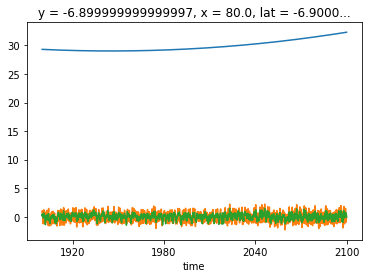

In [27]:

trendXr.isel(y=20,x=20).plot()

detrendXr.isel(y=20,x=20).plot()

sstAnomXr.isel(y=20,x=20).plot()

In [28]:
import cartopy.crs as ccrs


In [29]:
#there seems to be a bug in the Eof solver that doesn't handle dask very well,so pre calculating the result makes it work
sstAnomXr.load()

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray (time: 2400, y: 87, x: 141)>
array([[[-0.49881217, -0.57474624, -0.76154808, ..., -0.78992518,
         -0.81309392, -0.90478787],
        [-0.47393077, -0.60540663, -0.75192447, ..., -0.78076518,
         -0.81922593, -0.95125925],
        [-0.47237497, -0.6023609 , -0.74243702, ..., -0.79776008,
         -0.86510019, -1.00917073],
        ...,
        [ 0.10448065,  0.14603038,  0.18705158, ..., -0.382703  ,
         -0.37728859, -0.29150062],
        [ 0.06244661,  0.12284632,  0.18444076, ..., -0.36460137,
         -0.35531861, -0.30708642],
        [ 0.00340805,  0.07563491,  0.16414596, ..., -0.34368318,
         -0.33998417, -0.32559511]],

       [[-0.4441594 , -0.49347469, -0.5759071 , ..., -0.74859661,
         -0.81349506, -0.85290451],
        [-0.36300477, -0.39445005, -0.51881388, ..., -0.7750424 ,
         -0.84404728, -0.87247252],
        [-0.32302093, -0.32688046, -0.45832407, ..., -0.8014006 ,
         -0.89027685, -0.90259509],
...
        [ 0.07167453,  0.00342299, -0.07896959, ..., -0.36874872,
         -0.38257431, -0.43310253],
        [ 0.08125822,  0.01361396, -0.06273893, ..., -0.37423074,
         -0.37909131, -0.41053883],
        [ 0.0976475 ,  0.03192834, -0.03619752, ..., -0.38022138,
         -0.38130017, -0.38288889]],

       [[-0.54248769, -0.47351721, -0.59209783, ..., -0.10518977,
         -0.16064364, -0.16634998],
        [-0.47563647, -0.45555755, -0.56270431, ..., -0.08460202,
         -0.10878633, -0.09345121],
        [-0.39074818, -0.43508862, -0.53248944, ..., -0.06847031,
         -0.0658541 , -0.01241966],
        ...,
        [-0.57108564, -0.62509776, -0.67235148, ..., -0.43526673,
         -0.43987943, -0.45706637],
        [-0.57522948, -0.63119985, -0.67943954, ..., -0.42448408,
         -0.41661288, -0.4102074 ],
        [-0.54894948, -0.61102744, -0.66672566, ..., -0.42917646,
         -0.3909416 , -0.35428373]]])
Coordinates:
  * time     (time) object 1900-01-16 00:00:00 ... 2099-12-16 00:00:00
  * y        (y) float64 -15.0 -14.5 -14.0 -13.5 -13.0 ... 13.5 14.0 14.5 15.0
  * x        (x) float64 60.0 61.0 62.0 63.0 64.0 ... 197.0 198.0 199.0 200.0
    lat      (y, x) float64 -15.0 -15.0 -15.0 -15.0 ... 15.0 15.0 15.0 15.0
    lon      (y, x) float64 140.0 141.0 142.0 143.0 ... 277.0 278.0 279.0 280.0
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [30]:
def myFunc(xr):

    #although they don't really say this, I've applied an area weighting.

    #weights = numpy.cos(numpy.deg2rad(xr.lat)
    #                ).values[..., numpy.newaxis]

    solver=Eof(xr) #, weights=weights)

    #each described by a principal spatial pattern and an associated
    #principal component (PC) time series.

    pcXr = solver.pcs(pcscaling=1, npcs=2)
   
    return pcXr

In [31]:
#dcfAnomsXr=tp.averageForTimePeriod(sstAnomXr.rename('enso').to_dataset()).enso
#dcfAnomsXr=dcfAnomsXr.rename({'year':'time'})

In [32]:
#dcfAnomsXr=sstAnomXr.where(
#    (sstAnomXr.time.dt.month==12)+(sstAnomXr.time.dt.month==1)+(sstAnomXr.time.dt.month==2), drop=True)

In [33]:
pcTimeXr=myFunc(sstAnomXr)

In [34]:
pcTimeXr

<xarray.DataArray 'pcs' (time: 2400, mode: 2)>
array([[-1.31392012, -0.10222879],
       [-1.28719166, -0.6879874 ],
       [-1.22243506, -0.86651357],
       ...,
       [ 0.43781036,  0.31108316],
       [ 0.62071669,  0.31100076],
       [ 0.83191164,  0.35323729]])
Coordinates:
  * time     (time) object 1900-01-16 00:00:00 ... 2099-12-16 00:00:00
  * mode     (mode) int64 0 1
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [35]:
def ensoPlotter(da, ax):
    cs=plt.contourf(da.lon, da.lat, da.values,  
                    transform=ccrs.PlateCarree(), 
                   center=True)

    gl=ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle=':')
    ax.coastlines(color='black')
    gl.top_labels=False
    #gl.left_labels=False

        #bottom legend
    cbar=plt.colorbar(orientation='horizontal', fraction=0.05, pad=0.05)

In [36]:
pcTimeXr.std('time')

<xarray.DataArray 'pcs' (mode: 2)>
array([0.99979164, 0.99979164])
Coordinates:
  * mode     (mode) int64 0 1

In [37]:
pcTimeXr.mean('time')

<xarray.DataArray 'pcs' (mode: 2)>
array([2.15105711e-17, 3.51570624e-18])
Coordinates:
  * mode     (mode) int64 0 1

In [38]:
dcfTimeXr=pcTimeXr.where((pcTimeXr.time.dt.month==12)+(
    pcTimeXr.time.dt.month==1)+(pcTimeXr.time.dt.month==2), drop=True)

In [39]:
#pc1 = tp.averageForTimePeriod(pcTimeXr.sel(mode=0).rename('enso').to_dataset()).enso
#pc2 = tp.averageForTimePeriod(pcTimeXr.sel(mode=1).rename('enso').to_dataset()).enso

pc1 = pcTimeXr.sel(mode=0)
pc2 = pcTimeXr.sel(mode=1)

In [40]:
pc1

<xarray.DataArray 'pcs' (time: 2400)>
array([-1.31392012, -1.28719166, -1.22243506, ...,  0.43781036,
        0.62071669,  0.83191164])
Coordinates:
  * time     (time) object 1900-01-16 00:00:00 ... 2099-12-16 00:00:00
    mode     int64 0
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [41]:
import numpy.polynomial as poly

In [42]:
pFit = poly.Polynomial.fit(pc1, pc2, 2)



In [43]:
pFit

Polynomial([ 0.28968355,  0.86055741, -3.23822826], domain=[-3.46505022,  2.64468139], window=[-1.,  1.])

In [44]:
pFit.convert()

Polynomial([ 0.34685039, -0.0029633 , -0.34699497], domain=[-1.,  1.], window=[-1.,  1.])

In [45]:
alpha = pFit.convert().coef[2]

In [46]:
alpha

-0.34699497365025717

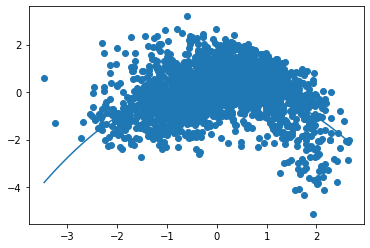

In [47]:
fig = plt.figure()

plt.scatter(pc1, pc2)

plt.plot(*pFit.linspace())